## 2. Harris Corner Detection

Harris corner detection identifies corners by analyzing the gradients of the image in different directions. It uses the following steps:
1. Compute the image gradients. $$I_x , I_y$$
2. Compute the products of gradients at every pixel. $$Ix^2, Iy^2, and Ix*Iy$$
3. Form the Harris matrix and compute the response at each pixel.
4. Apply thresholding to identify corners.


References:
- https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html
- https://en.wikipedia.org/wiki/Harris_corner_detector

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### OpenCV Harris Corner Detection
Here, we will use OpenCV's built-in `cv2.cornerHarris()` function to detect corners.


<Figure size 1200x1200 with 0 Axes>

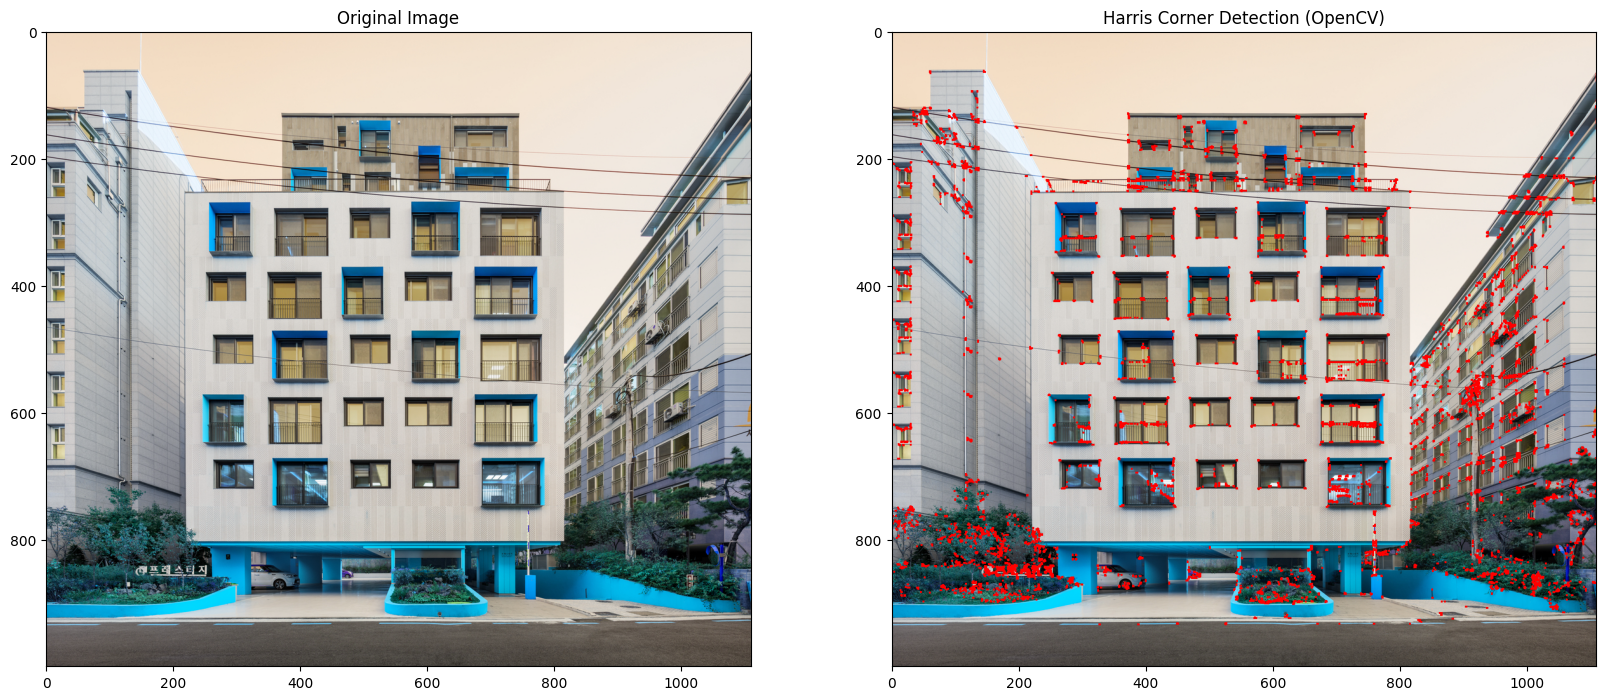

In [13]:
# OpenCV Implementation
plt.figure(figsize=(12, 12))
img = cv.imread('assets/building.jpg')
copy_img = np.copy(img)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32)
harris_response = cv.cornerHarris(img_gray, 2, 3, 0.04)

#result is dilated for marking the corners, not important
harris_response = cv.dilate(harris_response,None)

# Marking the corners on the original image
img[harris_response > 0.01 * harris_response.max()] = [255, 0, 0]

# Displaying using matplotlib
plt.figure(figsize=(20, 18)) 
plt.subplot(121),plt.imshow(copy_img,'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(img, cmap='gray')
plt.title('Harris Corner Detection (OpenCV)')
plt.show()

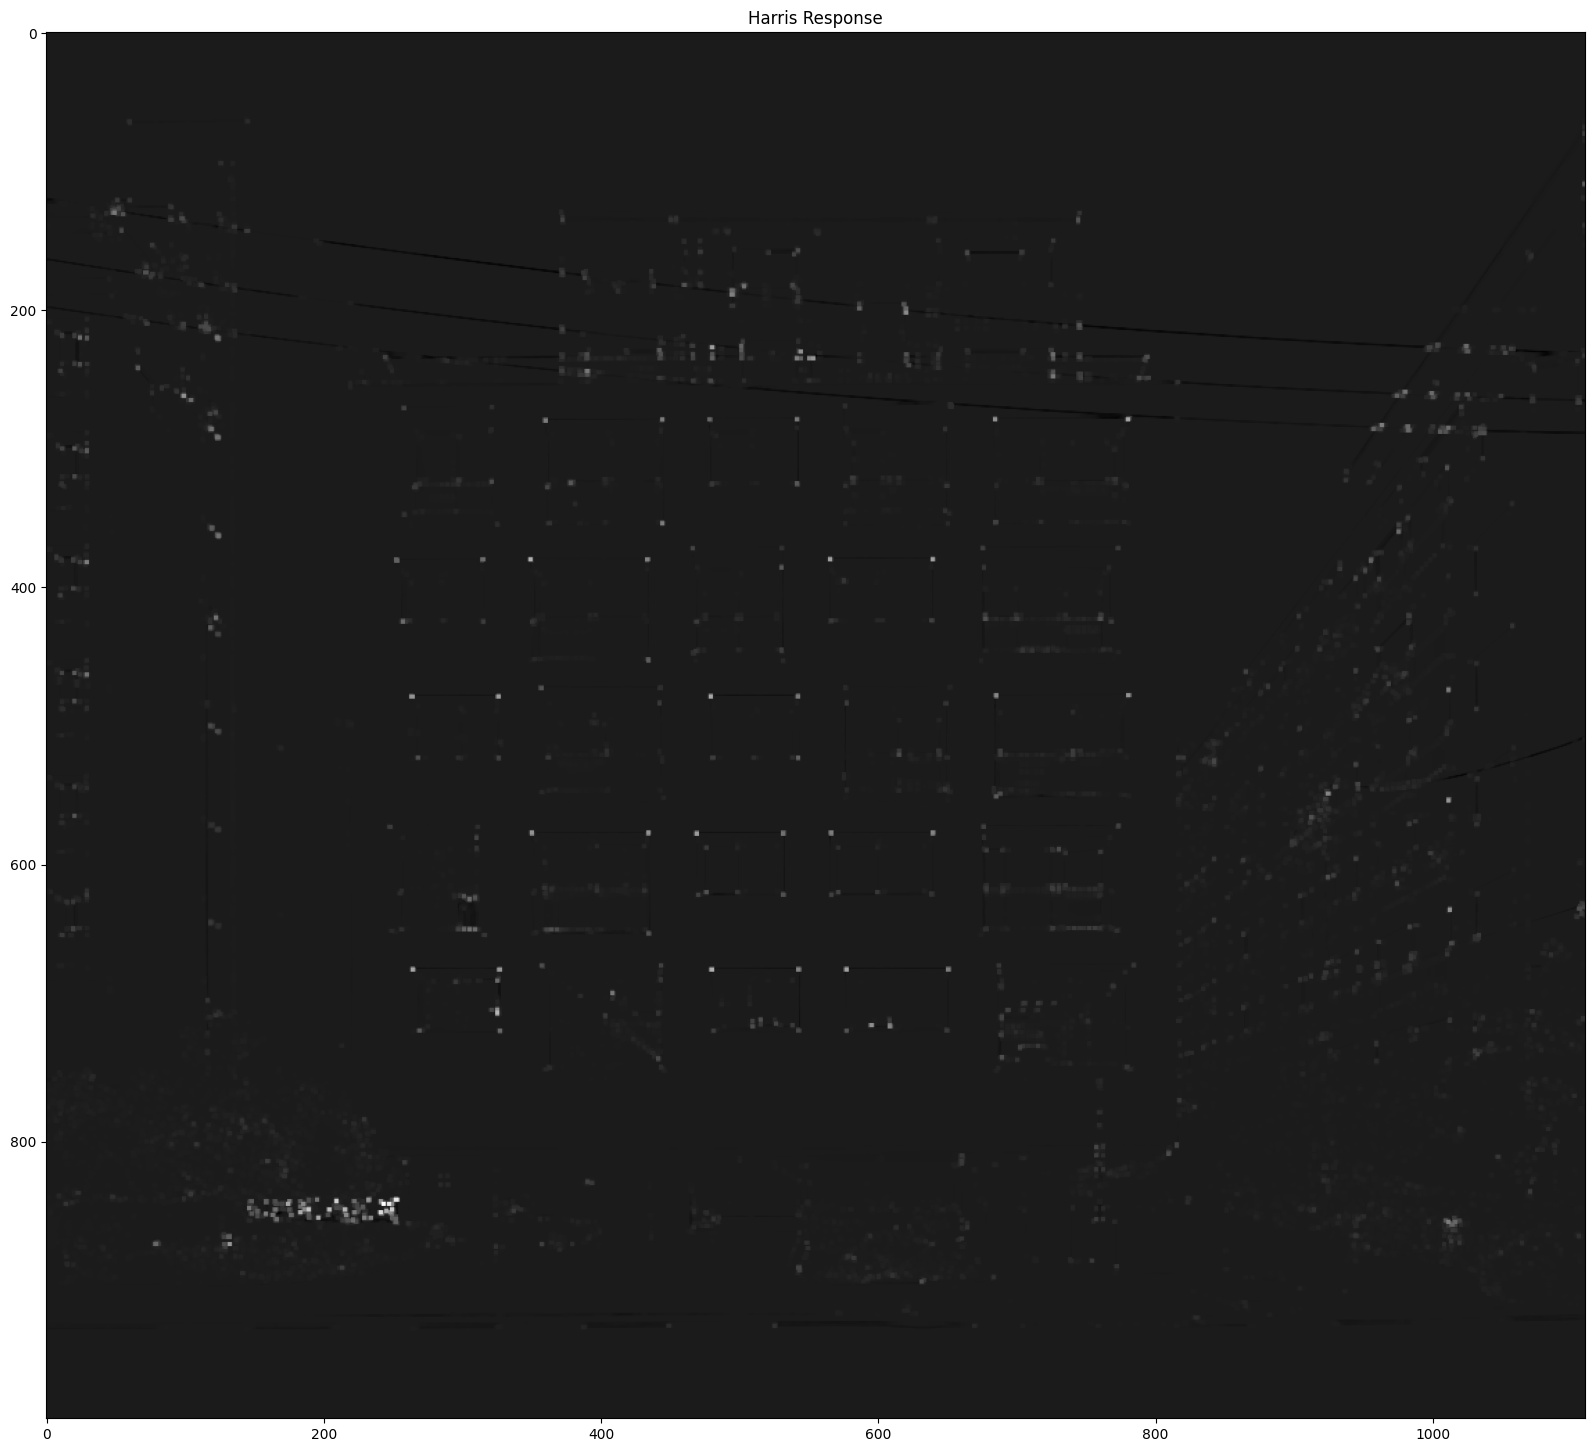

In [4]:
plt.figure(figsize=(20, 18)) 
plt.imshow(harris_response, cmap='gray')
plt.title('Harris Response')
plt.show()


### Self-defined Harris Corner Detection Class
Lets create a class that implements the Harris corner detection step-by-step and allows for intermediate plotting.

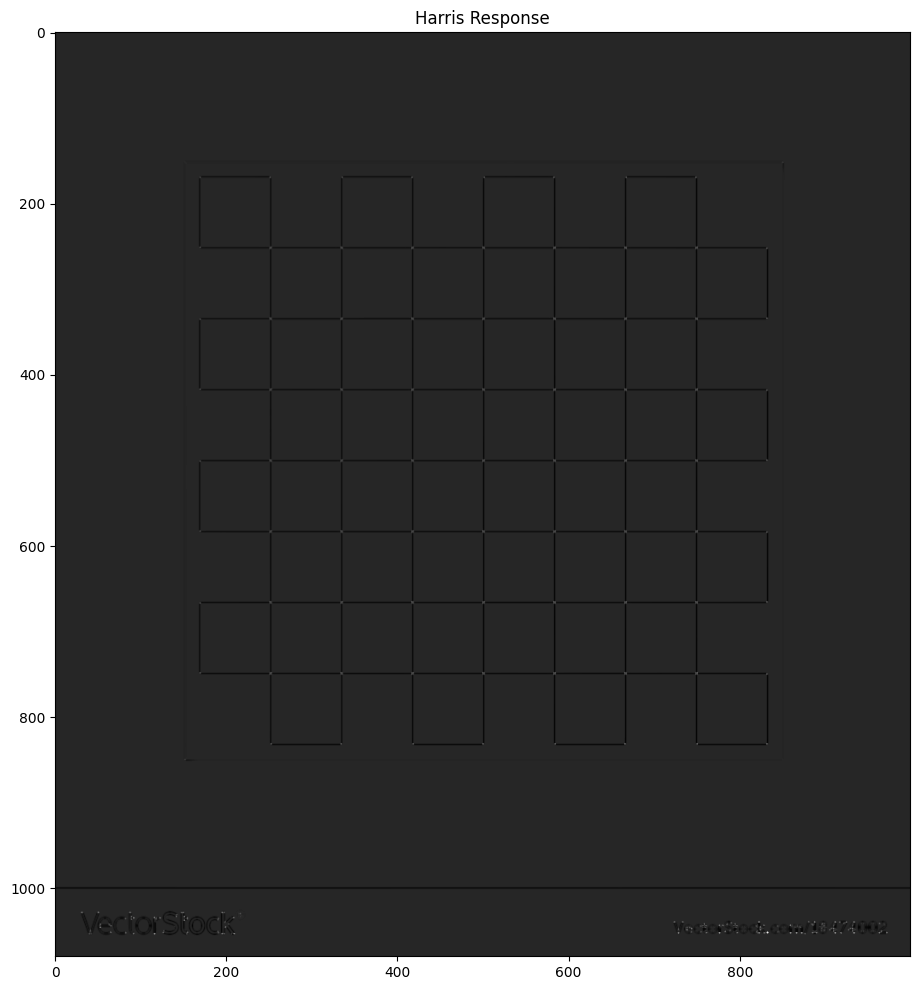

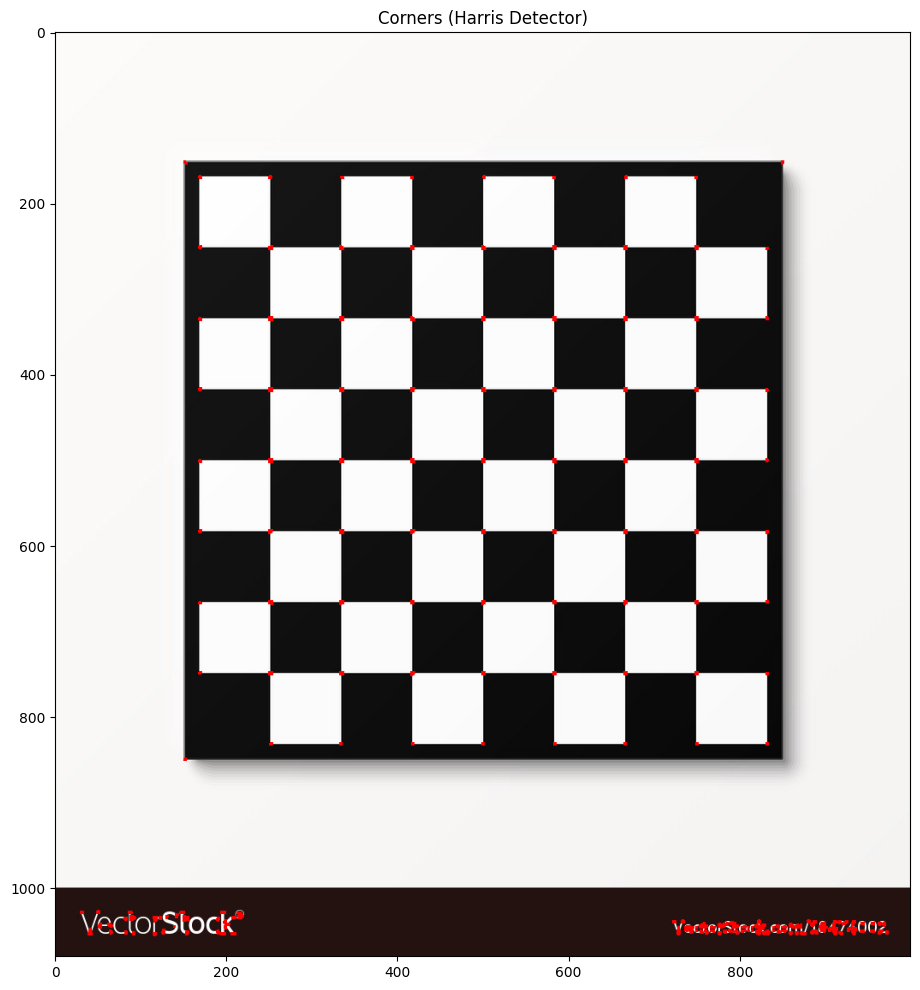

In [5]:
class HarrisCornerDetector:
    def __init__(self, img, block_size=2, ksize=3, k=0.04):
        self.img = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32)
        self.block_size = block_size
        self.ksize = ksize
        self.k = k
        self.harris_response = None

    def compute_harris_response(self):
        self.harris_response = cv.cornerHarris(self.img, self.block_size, self.ksize, self.k)
        return self.harris_response

    def plot_harris_response(self):
        # Show Harris response matrix
        plt.figure(figsize=(12, 12))
        plt.imshow(self.harris_response, cmap='gray')
        plt.title('Harris Response')
        plt.show()

    def mark_corners(self, threshold=0.01):
        # Mark corners on the original image
        img_with_corners = np.copy(img)
        #result is dilated for marking the corners, not important
        self.harris_response = cv.dilate(self.harris_response,None)
        img_with_corners[self.harris_response > threshold * self.harris_response.max()] = [255, 0, 0]
        return img_with_corners

# Example usage
img = cv.imread('assets/chessboard.jpg')
harris_detector = HarrisCornerDetector(img)
harris_response = harris_detector.compute_harris_response()
harris_detector.plot_harris_response()
corners = harris_detector.mark_corners()

# Display corners marked on the original image
plt.figure(figsize=(12, 12))
plt.imshow(corners)
plt.title('Corners (Harris Detector)')
plt.show()
